In [3]:
from sklearn.linear_model import LogisticRegression
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import holidays
from sklearn.model_selection import GridSearchCV
import numpy as np
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import itertools
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [10]:
series = pd.read_csv('datacount7.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
train_end_date = '2023-07-01'
train_end_date = pd.to_datetime(train_end_date)
train = series.loc[series.index < train_end_date]
test = series.loc[series.index >= train_end_date]

C:\Users\1\AppData\Local\Temp\ipykernel_18008\579786044.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('datacount7.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


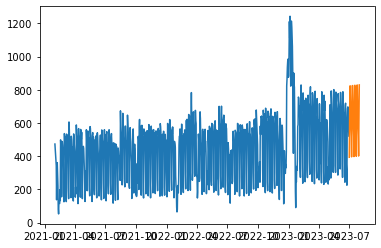

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

train.index.freq = train.index.inferred_freq
stlf = STLForecast(train, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(31)
plt.plot(train)
plt.plot(forecast)
plt.show()

In [19]:
forecast = pd.DataFrame(forecast)
test = pd.DataFrame(test)

In [24]:
forecast.rename(columns={0: 'yhat'}, inplace=True)
test.rename(columns={0: 'y'}, inplace=True)

In [25]:
df_all = pd.merge(forecast,test,left_index=True, right_index=True)
df_all['yhat'] = round(df_all['yhat'])

In [26]:
df_all['gap'] = abs(df_all['yhat'] - df_all['y'])
df_all.dtypes
df_all['yhat'] = df_all['yhat'].astype('int32')
df_all['gap'] = df_all['gap'].astype('int32')
gapsum = df_all['gap'].sum()
sumall = df_all['y'].sum()
percent = gapsum/sumall
percent

0.26367088607594935